In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



C:\Users\jhroe\AppData\Local\Temp\ipykernel_7376\1826466828.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

# Get current directory
path = os.getcwd()
data_path = path + '/Data/'

# Set path 
output_dir = f"{data_path}/enrichment_results/"

poshits = pd.read_csv(f"{data_path}/enrichment_results/hits/poshits_nb_enrichment.csv")
neghits = pd.read_csv(f"{data_path}/enrichment_results/hits/neghits_nb_enrichment.csv")
poshits_hom = pd.read_csv(f"{data_path}/enrichment_results/hits/poshits_nb_enrichment_hom.csv")
neghits_hom = pd.read_csv(f"{data_path}/enrichment_results/hits/neghits_nb_enrichment_hom.csv")

poshits

hits = pd.merge(poshits, neghits, how='inner', on=['new_ID', 'community'])
hits_hom = pd.merge(poshits_hom, neghits_hom, how='inner', on=['new_ID', 'community'])

hits


,new_ID,community,count_above_pos,label_x,count_above_neg,label_y
0,B - Th,26,34,Pos. Hits: 34,101,Neg. Hits: 101
1,B - Th,27,96,Pos. Hits: 96,7,Neg. Hits: 7
2,Cl_Mac - B,26,8,Pos. Hits: 8,196,Neg. Hits: 196
3,Cl_Mac - B,27,21,Pos. Hits: 21,0,Neg. Hits: 0
4,Endothelial - B,26,11,Pos. Hits: 11,187,Neg. Hits: 187
5,Endothelial - B,27,7,Pos. Hits: 7,0,Neg. Hits: 0
6,Tc - B,26,20,Pos. Hits: 20,185,Neg. Hits: 185
7,Tc - B,27,9,Pos. Hits: 9,0,Neg. Hits: 0
8,Th - B,26,29,Pos. Hits: 29,210,Neg. Hits: 210
9,Th - B,27,18,Pos. Hits: 18,0,Neg. Hits: 0


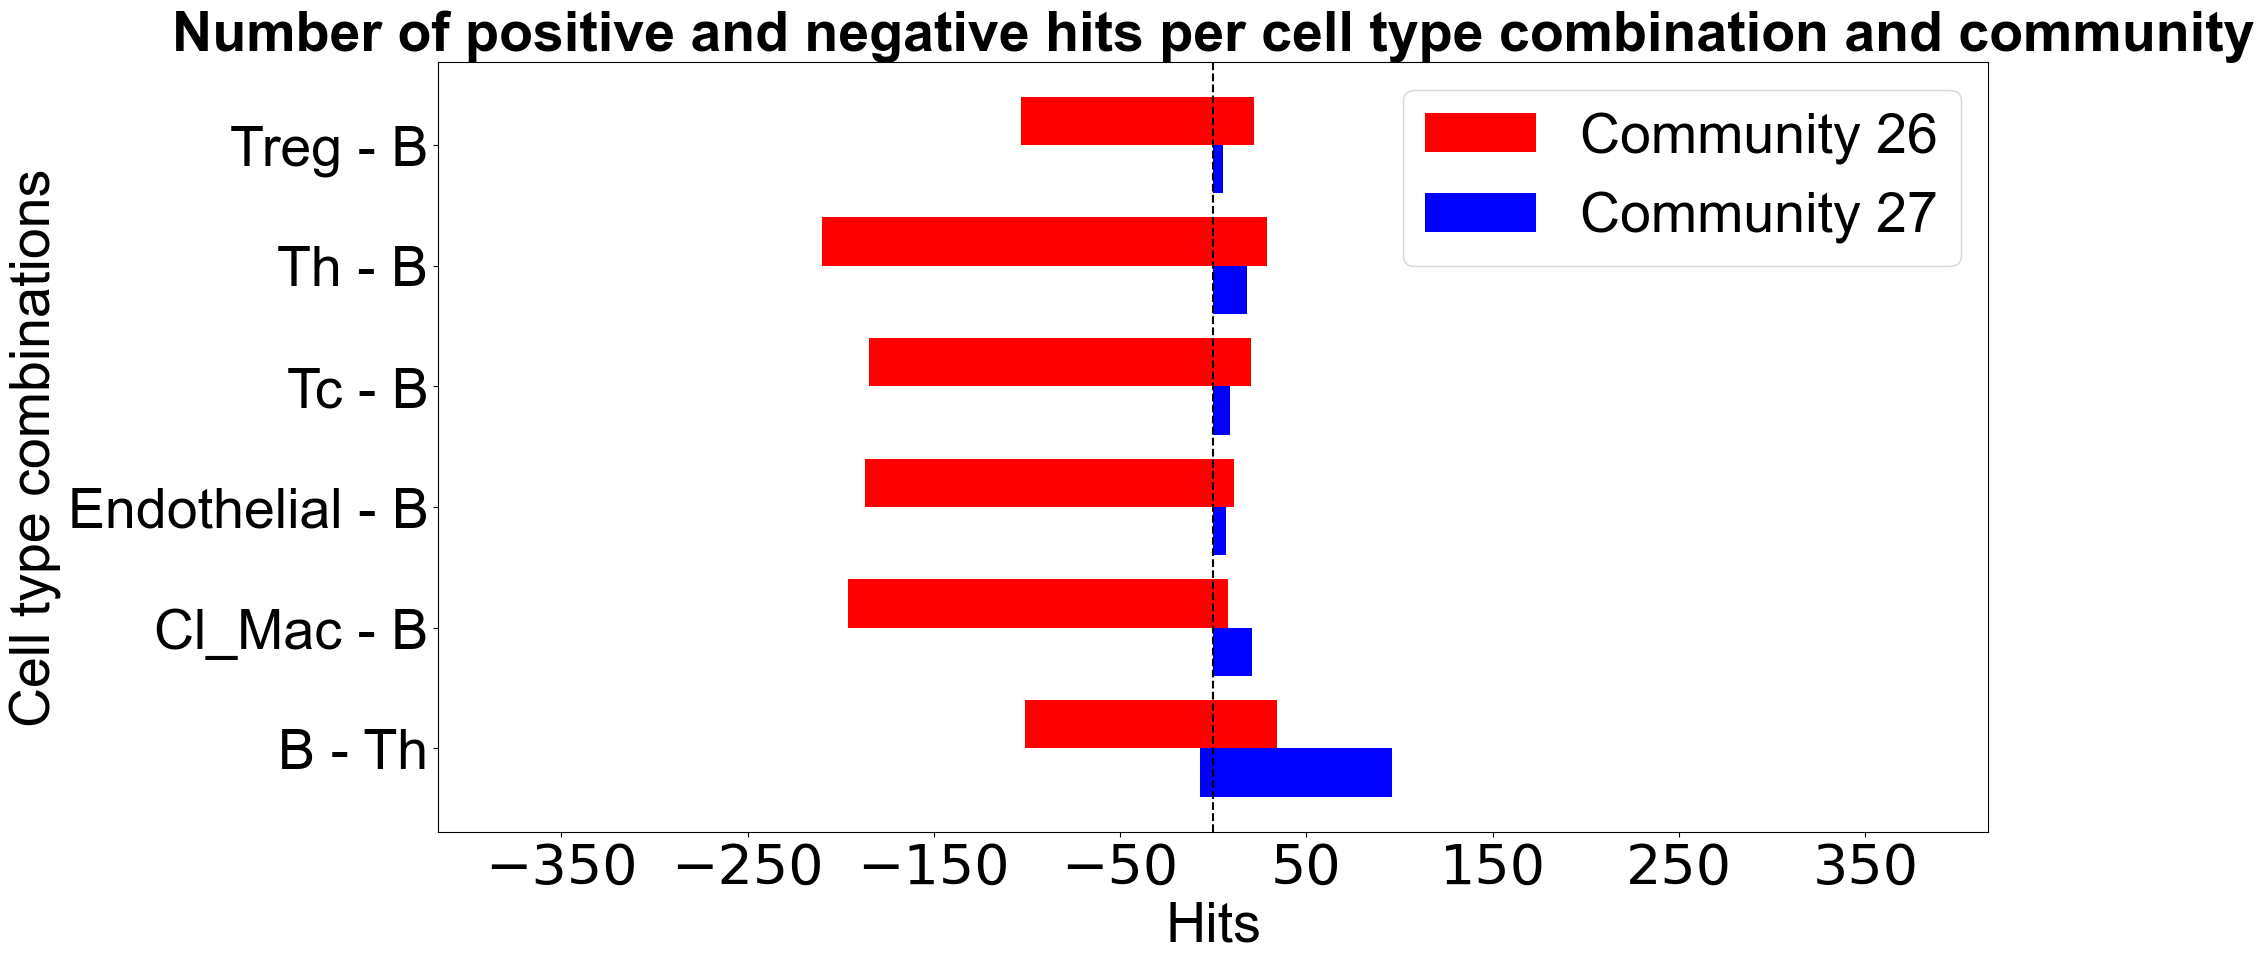

In [3]:
hits = pd.merge(poshits, neghits, how='inner', on=['new_ID', 'community'])
# Define the bar width
bar_width = 0.4

# Initialize the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Get unique cell types and communities
celltypes = hits['new_ID'].unique()
communities = hits['new_ID'].unique()

ax.axvline(x=0, color='black', linestyle='--')
celltype_positions = {celltype: i for i, celltype in enumerate(celltypes)}

# Plot each community for each cell type
for celltype in celltypes:
    pos_values = hits[(hits['new_ID'] == celltype) & (hits['community'] == 26)]['count_above_pos'].values
    neg_values = hits[(hits['new_ID'] == celltype) & (hits['community'] == 26)]['count_above_neg'].values

    pos_values2 = hits[(hits['new_ID'] == celltype) & (hits['community'] == 27)]['count_above_pos'].values
    neg_values2 = hits[(hits['new_ID'] == celltype) & (hits['community'] == 27)]['count_above_neg'].values
    
    y_pos = celltype_positions[celltype]
    
    # Plot positive and negative values for each community
    ax.barh(y_pos + bar_width/2, pos_values, bar_width, color='red', label='Community 26' if celltype == celltypes[0] else "")
    ax.barh(y_pos + bar_width/2, neg_values*-1, bar_width, color='red')

    ax.barh(y_pos - bar_width/2, pos_values2, bar_width, color='blue', label='Community 27' if celltype == celltypes[0] else "")
    ax.barh(y_pos - bar_width/2, neg_values2*-1, bar_width, color='blue')

    plt.xticks(range(-450,450,100), fontsize=40)
    # plt.yticks(fontsize=40)
    plt.xlim(-416, 416)

# Label the axes with font properties
ax.set_xlabel('Hits', fontdict={'fontsize': 40,  'family': 'Arial'})
ax.set_ylabel('Cell type combinations', fontdict={'fontsize': 40, 'family': 'Arial'})

# Set y-ticks to show the cell types with font properties
ax.set_yticks(list(celltype_positions.values()))
ax.set_yticklabels(celltypes, fontdict={'fontsize': 40, 'family': 'Arial'})
# ax.set_xticklabels(celltypes, fontdict={'fontsize': 40, 'family': 'Arial'})

# Add legend with font properties
ax.legend(fontsize=20, title_fontsize='40', loc='best')
plt.legend(prop={'size': 40, 'family': 'Arial'})

plt.title('Number of positive and negative hits per cell type combination and community', fontdict={'fontsize': 40, 'fontweight': 'bold', 'family': 'Arial'})
plt.savefig(f'{data_path}enrichment_results/nb_enrich_barplot.jpg', bbox_inches='tight', dpi=300)
plt.show()


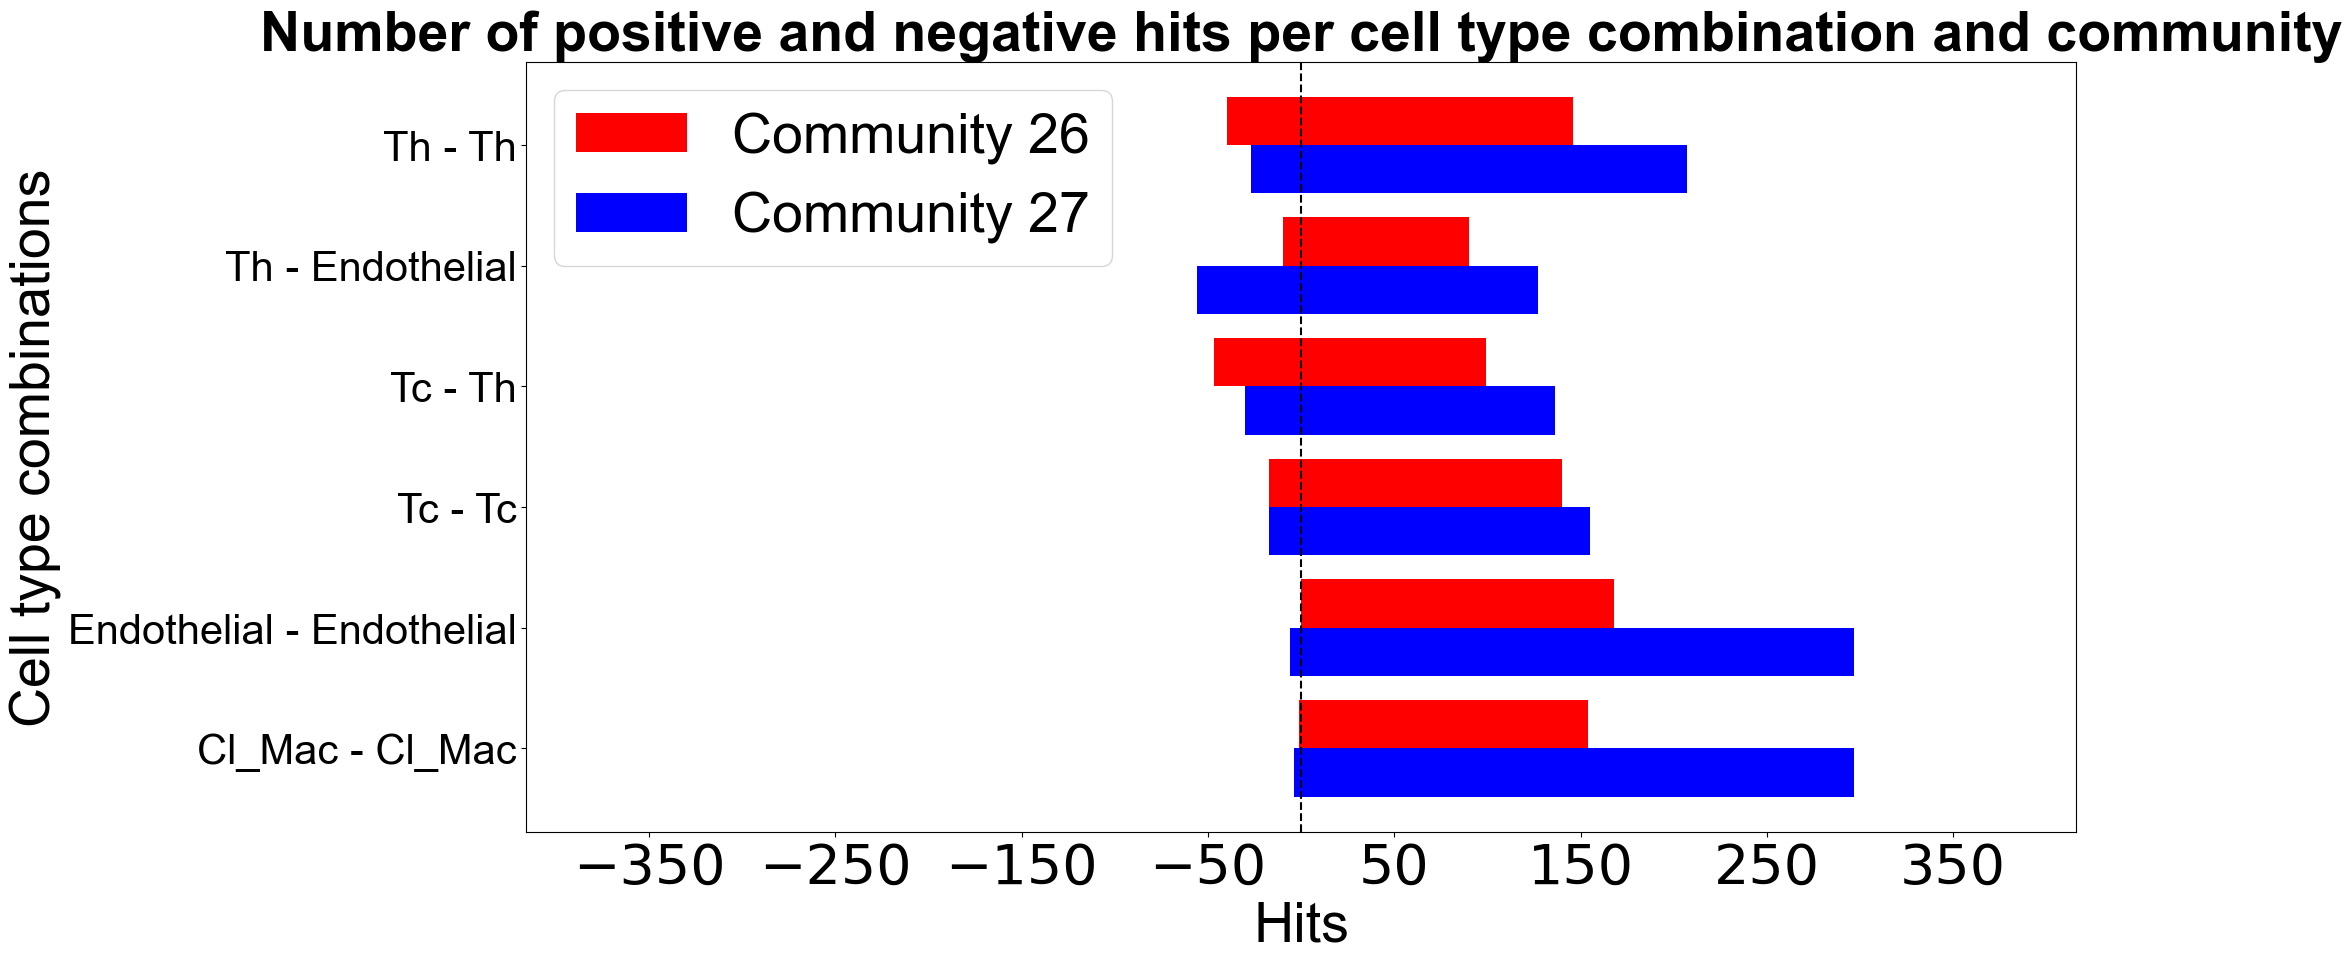

In [9]:

hits_hom = pd.merge(poshits_hom, neghits_hom, how='inner', on=['new_ID', 'community'])

hits = hits_hom# Define the bar width
bar_width = 0.4

# Initialize the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Get unique cell types and communities
celltypes = hits['new_ID'].unique()
communities = hits['new_ID'].unique()

ax.axvline(x=0, color='black', linestyle='--')
celltype_positions = {celltype: i for i, celltype in enumerate(celltypes)}

# Plot each community for each cell type
for celltype in celltypes:
    pos_values = hits[(hits['new_ID'] == celltype) & (hits['community'] == 26)]['count_above_pos'].values
    neg_values = hits[(hits['new_ID'] == celltype) & (hits['community'] == 26)]['count_above_neg'].values

    pos_values2 = hits[(hits['new_ID'] == celltype) & (hits['community'] == 27)]['count_above_pos'].values
    neg_values2 = hits[(hits['new_ID'] == celltype) & (hits['community'] == 27)]['count_above_neg'].values
    
    y_pos = celltype_positions[celltype]
    
    # Plot positive and negative values for each community
    ax.barh(y_pos + bar_width/2, pos_values, bar_width, color='red', label='Community 26' if celltype == celltypes[0] else "")
    ax.barh(y_pos + bar_width/2, neg_values*-1, bar_width, color='red')

    ax.barh(y_pos - bar_width/2, pos_values2, bar_width, color='blue', label='Community 27' if celltype == celltypes[0] else "")
    ax.barh(y_pos - bar_width/2, neg_values2*-1, bar_width, color='blue')

    plt.xticks(range(-450,450,100), fontsize=40)
    # plt.yticks(fontsize=40)
    plt.xlim(-416, 416)

# Label the axes with font properties
ax.set_xlabel('Hits', fontdict={'fontsize': 40,  'family': 'Arial'})
ax.set_ylabel('Cell type combinations', fontdict={'fontsize': 40, 'family': 'Arial'})

# Set y-ticks to show the cell types with font properties
ax.set_yticks(list(celltype_positions.values()))
ax.set_yticklabels(celltypes, fontdict={'fontsize': 30, 'family': 'Arial'})
# ax.set_xticklabels(celltypes, fontdict={'fontsize': 40, 'family': 'Arial'})

# Add legend with font properties
ax.legend(fontsize=20, title_fontsize='40', loc='best')
plt.legend(prop={'size': 40, 'family': 'Arial'})

plt.title('Number of positive and negative hits per cell type combination and community', fontdict={'fontsize': 40, 'fontweight': 'bold', 'family': 'Arial'})
plt.savefig(f'{data_path}enrichment_results/nb_enrich_barplot_hom.jpg', bbox_inches='tight', dpi=300)
plt.show()


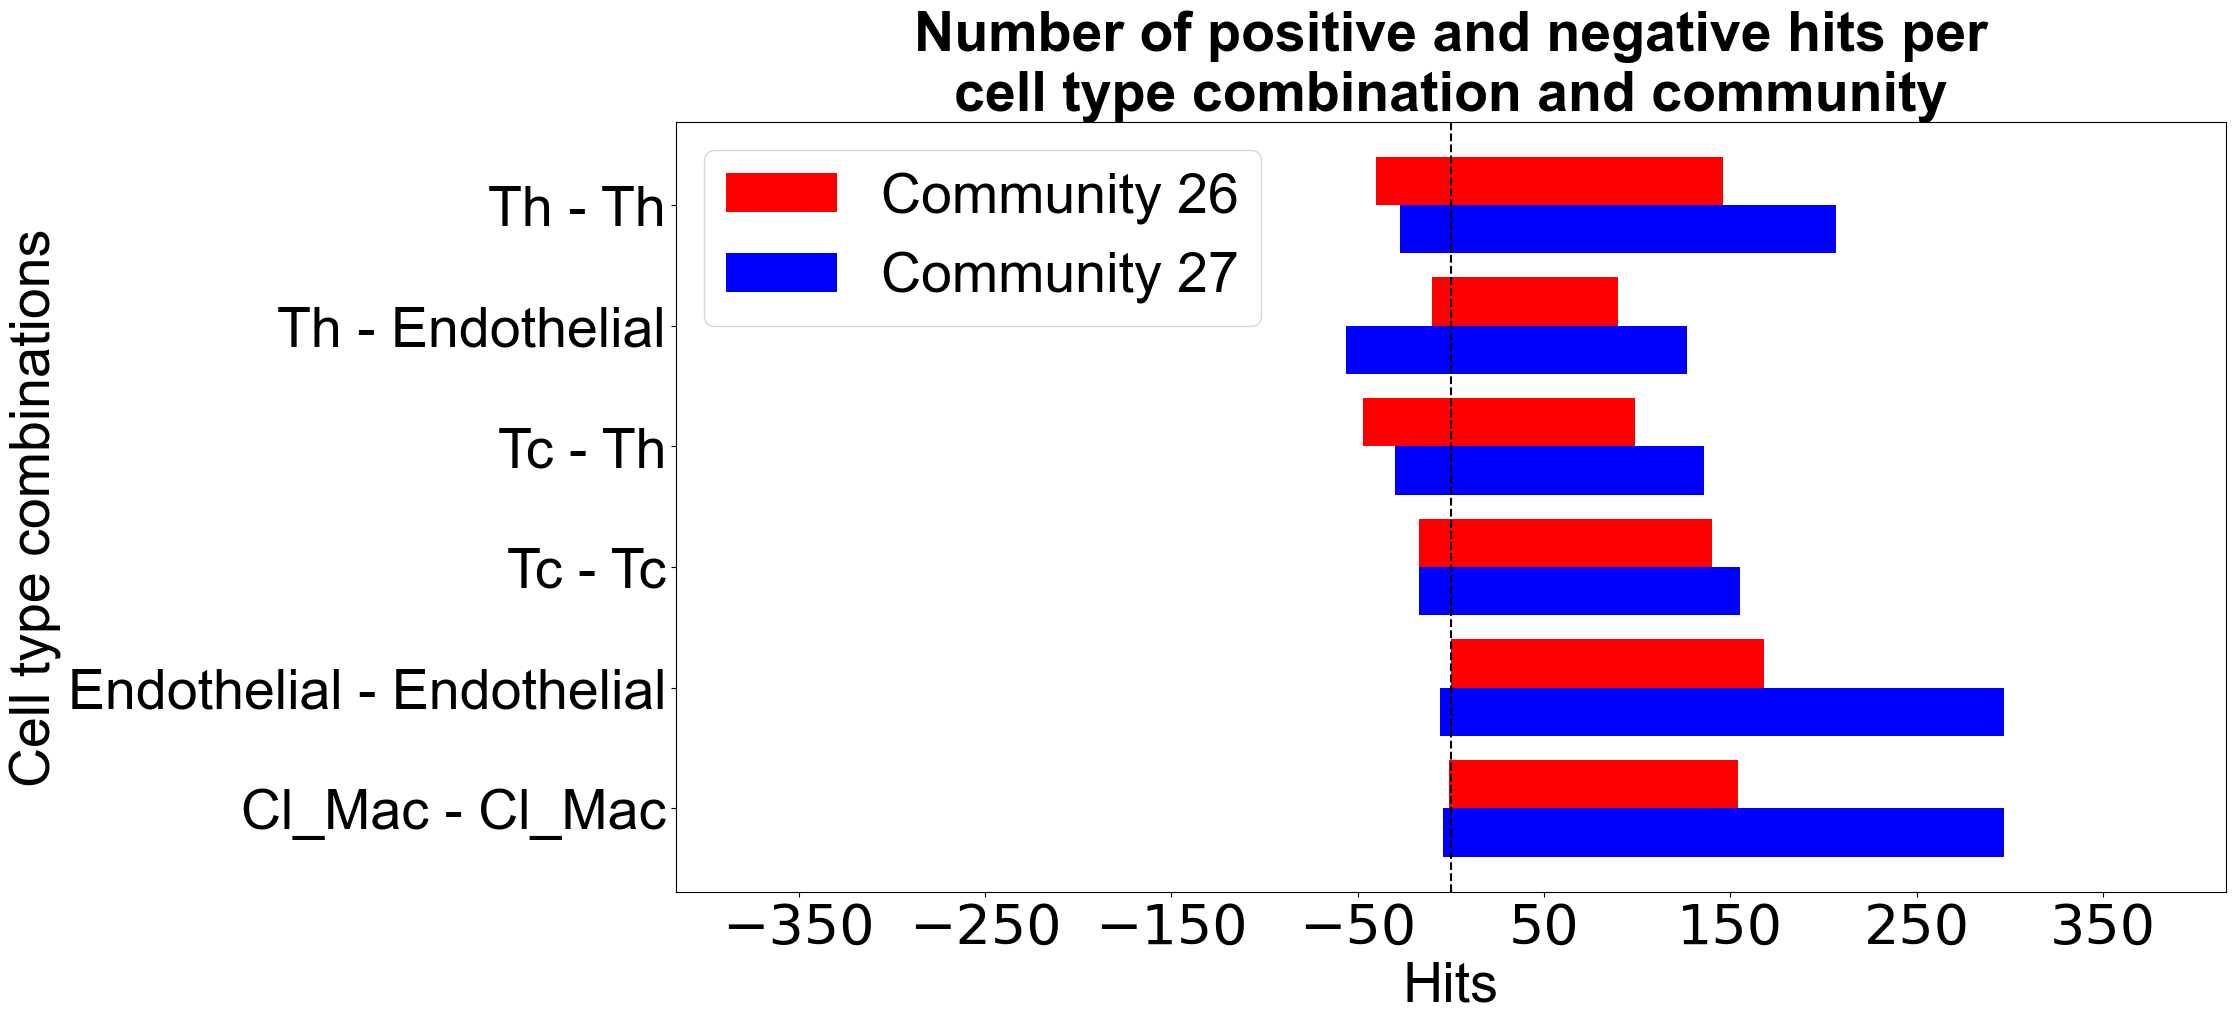

In [5]:
# Define the bar width
bar_width = 0.4

# Initialize the plot
fig, ax = plt.subplots(figsize=(20, 10))

hits_hom = pd.merge(poshits_hom, neghits_hom, how='inner', on=['new_ID', 'community'])

hits = hits_hom
# Get unique cell types and communities
celltypes = hits['new_ID'].unique()
communities = hits['new_ID'].unique()

ax.axvline(x=0, color='black', linestyle='--')
celltype_positions = {celltype: i for i, celltype in enumerate(celltypes)}

# Plot each community for each cell type
for celltype in celltypes:
    pos_values = hits[(hits['new_ID'] == celltype) & (hits['community'] == 26)]['count_above_pos'].values
    neg_values = hits[(hits['new_ID'] == celltype) & (hits['community'] == 26)]['count_above_neg'].values

    pos_values2 = hits[(hits['new_ID'] == celltype) & (hits['community'] == 27)]['count_above_pos'].values
    neg_values2 = hits[(hits['new_ID'] == celltype) & (hits['community'] == 27)]['count_above_neg'].values
    
    y_pos = celltype_positions[celltype]
    
    # Plot positive and negative values for each community
    ax.barh(y_pos + bar_width/2, pos_values, bar_width, color='red', label='Community 26' if celltype == celltypes[0] else "")
    ax.barh(y_pos + bar_width/2, neg_values*-1, bar_width, color='red')

    ax.barh(y_pos - bar_width/2, pos_values2, bar_width, color='blue', label='Community 27' if celltype == celltypes[0] else "")
    ax.barh(y_pos - bar_width/2, neg_values2*-1, bar_width, color='blue')

    plt.xticks(range(-450,450,100), fontsize=40)
    # plt.yticks(fontsize=40)
    plt.xlim(-416, 416)

# Label the axes with font properties
ax.set_xlabel('Hits', fontdict={'fontsize': 40,  'family': 'Arial'})
ax.set_ylabel('Cell type combinations', fontdict={'fontsize': 40, 'family': 'Arial'})

# Set y-ticks to show the cell types with font properties
ax.set_yticks(list(celltype_positions.values()))
ax.set_yticklabels(celltypes, fontdict={'fontsize': 40, 'family': 'Arial'})
# ax.set_xticklabels(celltypes, fontdict={'fontsize': 40, 'family': 'Arial'})

# Add legend with font properties
ax.legend(fontsize=20, title_fontsize='40', loc='best')
plt.legend(prop={'size': 40, 'family': 'Arial'})

# Add legend with font properties
# ax.legend(fontsize=20, title_fontsize='30', loc='upper left')
plt.title('Number of positive and negative hits per cell type combination and community', fontdict={'fontsize': 40, 'fontweight': 'bold', 'family': 'Arial'})
plt.savefig(f'{data_path}enrichment_results/nb_enrich_barplot_hom.jpg', bbox_inches='tight', dpi=300)
plt.show()
